In [10]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime

In [11]:
#Pulling in the data

try:
    tickers_df = pd.read_csv(r'Data\portfolio_pick.csv')
except FileNotFoundError:
    raise FileNotFoundError("The file 'portfolio_pick.csv' was not found. Please check the file path.")

if 'Stock' in tickers_df.columns:
    tickers = tickers_df['Stock'].dropna().unique().tolist()
else:
    tickers = tickers_df.iloc[:, 0].dropna().unique().tolist()

if not tickers:
    raise ValueError("No tickers found in the CSV file.")

In [12]:
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=365 * 10)

portfolio_data = {}
for ticker in tickers:
    #print(f"Downloading data for {ticker}...")
    data = yf.download(ticker, start=start_date, end=end_date)
    if data.empty:
        #print(f"Warning: No data found for ticker {ticker}. Skipping.")
        continue
    portfolio_data[ticker] = data['Adj Close']

if not portfolio_data:
    raise ValueError("No valid ticker data could be downloaded.")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [13]:
prices_df = pd.DataFrame(portfolio_data)

prices_df.ffill(inplace=True)


num_stocks = len(prices_df.columns)
allocated_amount = 10000 / num_stocks
portfolio_value_individual = (prices_df / prices_df.iloc[0]) * allocated_amount
portfolio_total = portfolio_value_individual.sum(axis=1)

In [14]:
#pulling in data for SP500 comparables

sp500_data = yf.download("^GSPC", start=start_date, end=end_date)
if sp500_data.empty:
    raise ValueError("Failed to download S&P 500 data.")
sp500_prices = sp500_data['Adj Close']

sp500_value = (sp500_prices / sp500_prices.iloc[0]) * 10000

voo = yf.download("VOO", start=start_date, end=end_date)['Adj Close']
voo_value = (voo / voo.iloc[0]) * 10000

spy = yf.download("SPY", start=start_date, end=end_date)['Adj Close']
spy_value = (spy / spy.iloc[0]) * 10000

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


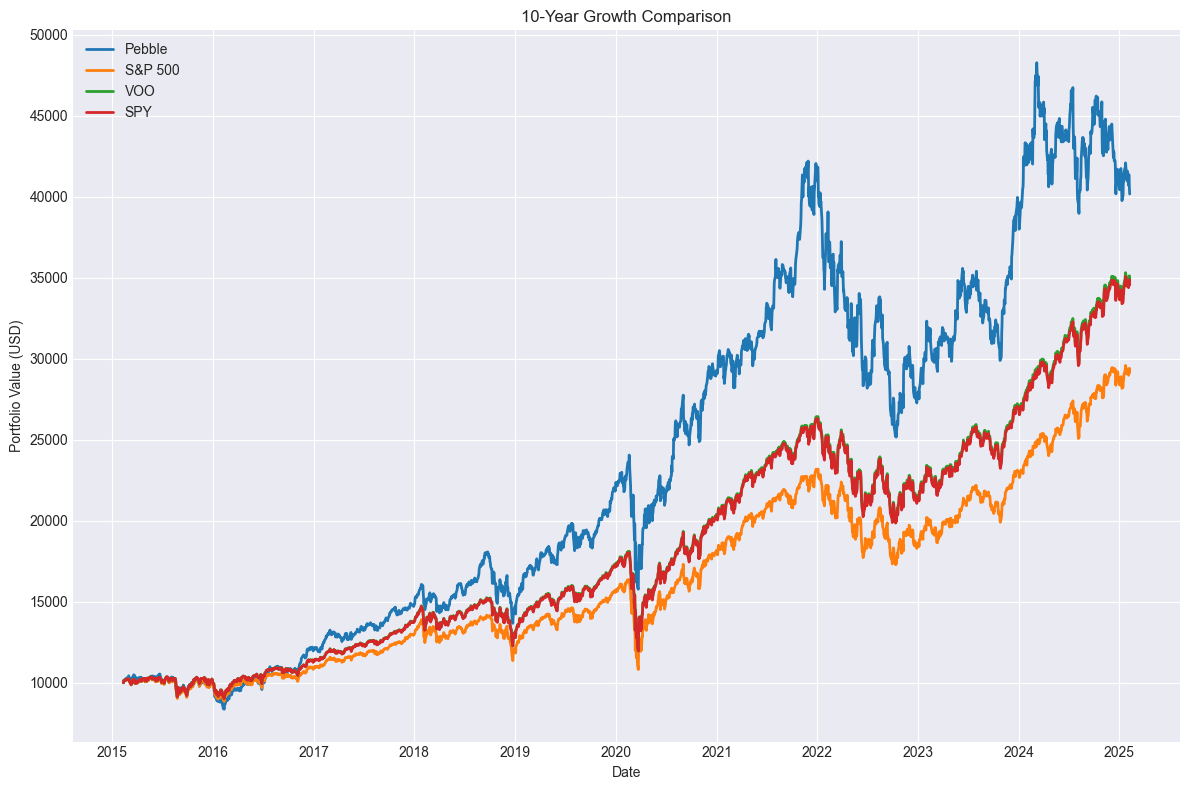

In [15]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(portfolio_total.index, portfolio_total, label='Pebble', linewidth=2)
ax.plot(sp500_value.index, sp500_value, label='S&P 500', linewidth=2)
ax.plot(voo_value.index, voo_value, label='VOO', linewidth=2)
ax.plot(spy_value.index, spy_value, label='SPY', linewidth=2)

ax.set_title("10-Year Growth Comparison")
ax.set_xlabel("Date")
ax.set_ylabel("Portfolio Value (USD)")
ax.legend()
plt.tight_layout()
plt.show()